## Lawn Mower

## n-step Bootstrapping 

Implement n-step Bootstrapping (e.g. n-step SARSA). Modify a base algorithm and implement 2-step or 3-step bootstrapping. Compare the results with base algorithm (e.g. SARSA, if you implemented n-step SARSA). In the report, include the comparison.

In [ ]:
env = MyLawn()

epsilon = 1.0  
epsilon_min = 0.01
gamma = 0.99 
alpha = 0.15 
decay_rate = 0.995  
total_episodes = 1000 
max_timestamp = 20
qt = np.zeros((env.obs_space.n, env.action_space.n))

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None

# n-step parameter
n_steps = 3

for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0
    episode_buffer = []

    action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[state_index])

    while True:
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_steps += 1
        next_strt_idx = env.obs_space_to_index(next_state)
        next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[next_strt_idx])
        episode_buffer.append((state_index, action, reward))

        if len(episode_buffer) >= n_steps:
            n_step_return = sum([gamma ** i * ep[2] for i, ep in enumerate(episode_buffer[:n_steps])])
            if not terminated and not truncated:
                n_step_return += gamma ** n_steps * qt[next_strt_idx, next_action]

            first_state, first_action, _ = episode_buffer.pop(0)
            qt[first_state, first_action] = qt[first_state, first_action] + alpha * (n_step_return - qt[first_state, first_action])

        state_index, action = next_strt_idx, next_action
        total_rewards += reward

        if terminated or truncated:
            break

    penalties_per_episode.append(env.get_penalty_count())

    # Q-table for every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table:")
        print(qt)

        # average penalties
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state


Episode: 100
Q-table:
[[ 3.94445164 10.08639766 18.91875449  8.69964422]
 [ 7.34899418  3.71372302 17.09500365  7.93464015]
 [11.32974305  4.85874467 19.55035796  6.03239534]
 [ 0.          0.          0.          0.        ]
 [-5.53433024  8.20183027  1.51922077  0.27462116]
 [ 1.04285868  2.8370333   6.35619062 -2.30078456]
 [14.16538219 -0.0261558   3.4989501   0.04973516]
 [ 7.22021349  1.72988481  4.33230443  0.1380079 ]
 [ 0.          0.          0.          0.        ]
 [-1.72725121 -0.40631091  5.96257258 -5.56560277]
 [ 0.14155166  1.81847876 14.82827911 -0.9072015 ]
 [ 0.          0.          0.          0.        ]
 [-2.85254799 -1.61959145 -2.67309    -0.12012034]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Average Penalties in Last 100 Episodes: 0.39
Episode: 100, Average Steps: 9.8
Episode: 200
Q-table:
[[24.07049497 29.58853666 34.63958723 26.67794259]
 [13.65531

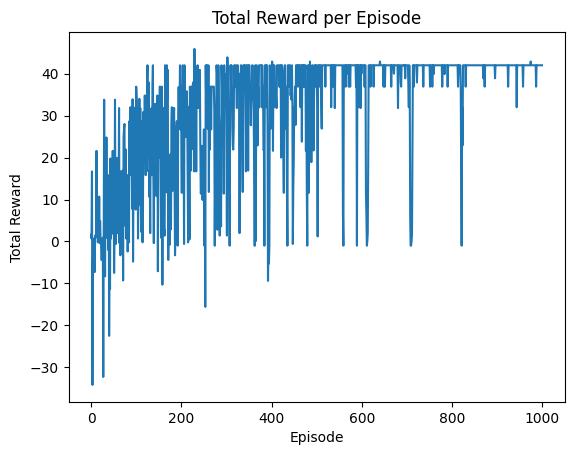

In [ ]:
plt.plot(rewards_epi)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

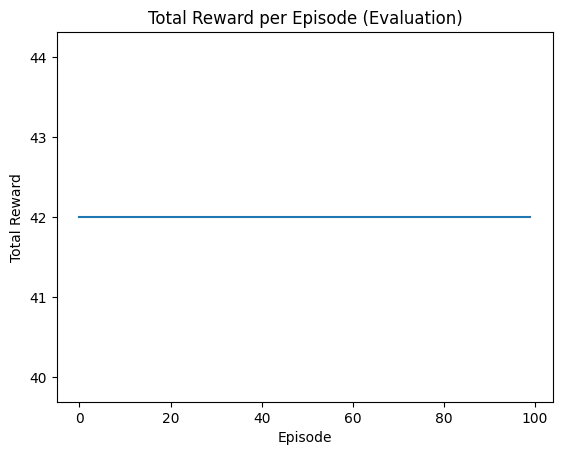

Q-table:
[[44.1256007  53.35813686 62.53869369 57.73107874]
 [38.1279308  59.18458017 71.41530477 56.65596674]
 [41.80258909 56.11509851 75.430626   52.7098201 ]
 [ 0.          0.          0.          0.        ]
 [ 3.76576835 49.62734564 10.81510914 12.44403827]
 [14.11605849  9.44147993 49.54091023 11.48853067]
 [23.71808427 10.48581347 54.66610341  5.9601476 ]
 [54.92863864 28.19988676  6.41422921 16.76306704]
 [ 0.          0.          0.          0.        ]
 [-1.72725121 -0.40631091 20.89423826 -5.56560277]
 [ 5.0693274  12.29077743 40.95858916 19.16889889]
 [ 0.          0.          0.          0.        ]
 [-2.85254799 -1.61959145 -1.7168265  -1.24898969]
 [ 0.          0.          0.          0.        ]
 [-0.9207015   0.          0.         -2.4569505 ]
 [ 0.          0.          0.          0.        ]]


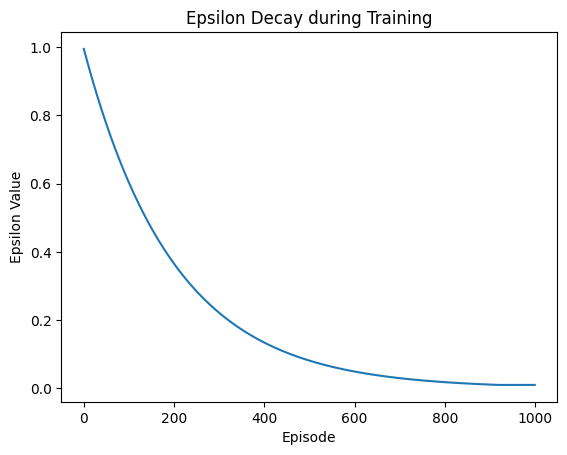

In [ ]:
def evaluate_n_step_sarsa(env, q_table, n_steps):
    total_episodes = 100
    total_rewards_eval = []

    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0

        while True:
            action = np.argmax(q_table[state_index])
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_state_index = env.obs_space_to_index(next_state)
            n_step_return = reward
            for i in range(1, n_steps + 1):
                if not terminated and not truncated:
                    n_step_return += env.gamma ** i * q_table[next_state_index, np.argmax(q_table[next_state_index])]
            
            total_rewards += reward
            state_index = next_state_index

            if terminated or truncated:
                break

        total_rewards_eval.append(total_rewards)
    return total_rewards_eval

eval_rewards = evaluate_n_step_sarsa(env, qt, n_steps)

plt.plot(eval_rewards)
plt.title('Total Reward per Episode (Evaluation)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

print("Q-table:")
print(qt)

plt.plot(epsilon_values)
plt.title('Epsilon Decay during Training')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()
